# Overview
This notebook demonstrates how to load costs reduced diagnostics data and plot the corresponding distribution mappings and costs.

# Generating the data
To generate your own 'Load Balance Costs' reduced diagnostics output, WarpX should be run with the following lines added to your WarpX input file (the name of the reduced diagnostics file,`LBC`, and interval in steps to output reduced diagnostics data, `100`, may be changed according to your requirements):
```
warpx.reduced_diags_names = LBC
LBC.type = LoadBalanceCosts 
LBC.frequency = 100
```
The line `warpx.reduced_diags_names = LBC` sets the name of your reduced diagnostics output file to `LBC`.  The next line `LBC.type = LoadBalanceCosts` tells WarpX that the reduced diagnostics is a `LoadBalanceCosts` diagnostic, and instructs WarpX to record costs and rank layouts.  The final line here, `LBC.frequency = 100`, controls the interval for output of this reduced diagnostic's data.

For further details, please refer to:
- https://warpx.readthedocs.io/en/latest/visualization/reduced_diags.html
- https://warpx.readthedocs.io/en/latest/running_cpp/parameters.html?highlight=loadbalancecosts

# Imports

In [1]:
# Math
import numpy as np
import random

# Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Data handling
import analysis as an

# Load data

In [2]:
sim_knapsack = an.SimData('./data/LBC_knapsack.txt', # Data directory
                                           [2800]    # Files to process
                         )
sim_sfc = an.SimData('./data/LBC_sfc.txt', [2800])

# Set reduced diagnostics data for step 2800
for sim in [sim_knapsack, sim_sfc]: sim(2800)

# Plotting (distribution mappings)

In [3]:
# Plotting -- we know beforehand the data is 2D
def plot(sim):
    """
    Plot MPI rank layout for a set of `LoadBalanceCosts` reduced diagnostics (2D) data.
    
    Arguments:
    sim -- SimData class with data (2D) loaded for desired iteration
    """
    # Make first cmap
    cmap = plt.cm.nipy_spectral
    cmaplist = [cmap(i) for i in range(cmap.N)][::-1]
    unique_ranks = np.unique(sim.rank_arr)
    sz = len(unique_ranks)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Make cmap from 1 --> 96 then randomize
    cmaplist= [cmap(i) for i in range(sz)]
    random.Random(6).shuffle(cmaplist)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Define the bins and normalize
    bounds = np.linspace(0, sz, sz + 1)
    norm = mpl.colors.BoundaryNorm(bounds, sz)

    my, mx = sim.rank_arr.shape
    xcoord, ycoord = np.linspace(0,mx,mx+1), np.linspace(0,my,my+1)
    im = plt.pcolormesh(xcoord, ycoord, sim.rank_arr,
                        cmap=cmap, norm=norm)

    # Grid lines
    plt.ylabel('$j$')
    plt.xlabel('$i$')
    plt.minorticks_on()
    plt.hlines(ycoord, xcoord[0], xcoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')
    plt.vlines(xcoord, ycoord[0], ycoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')

    plt.gca().set_aspect('equal')

    # Center rank label
    for j in range(my):
        for i in range(mx):
            text = plt.gca().text(i+0.5, j+0.5, int(sim.rank_arr[j][i]),
                                  ha="center", va="center", 
                                  color="w", fontsize=8)

    # Colorbar
    divider = make_axes_locatable(plt.gca())
    cax = divider.new_horizontal(size="5%", pad=0.05)
    plt.gcf().add_axes(cax)
    cb=plt.gcf().colorbar(im, label='rank', cax=cax, orientation="vertical")
    minorticks = np.linspace(0, 1, len(unique_ranks) + 1)
    cb.ax.yaxis.set_ticks(minorticks, minor=True)

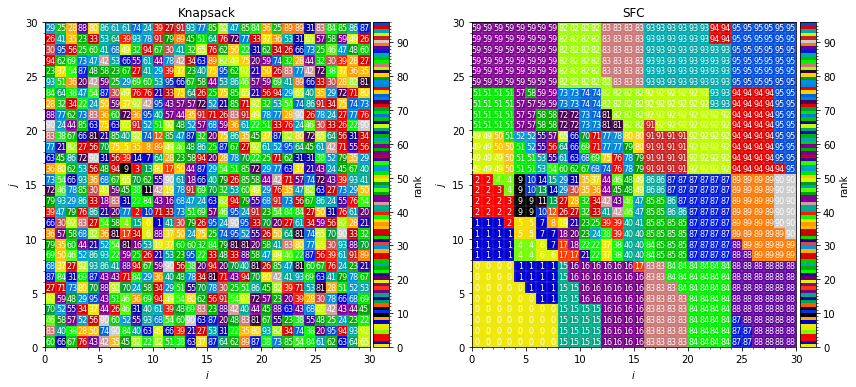

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(axs[0])
plt.title('Knapsack')
plot(sim_knapsack)
plt.sca(axs[1])
plt.title('SFC')
plot(sim_sfc)
plt.tight_layout()

# Plotting (cost arrays)

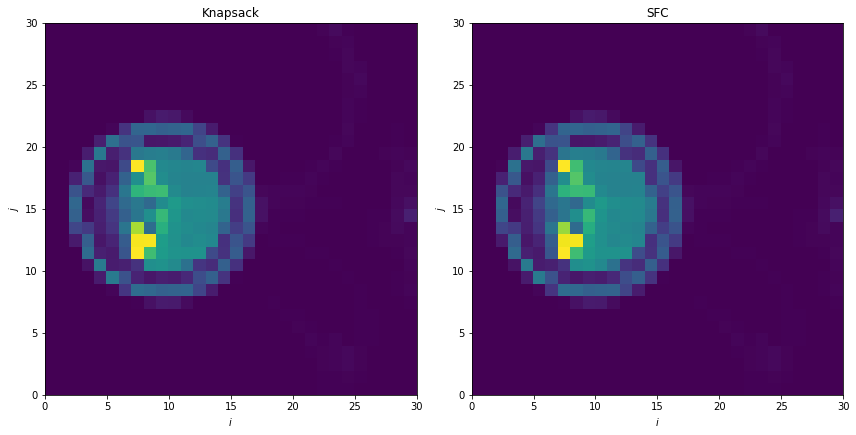

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
plt.sca(axs[0])
plt.title('Knapsack')
plt.pcolormesh(sim_knapsack.cost_arr)
plt.sca(axs[1])
plt.title('SFC')
plt.pcolormesh(sim_sfc.cost_arr)

for ax in axs:
    plt.sca(ax)
    plt.ylabel('$j$')
    plt.xlabel('$i$')
    ax.set_aspect('equal')
    
plt.tight_layout()

# Load data (3D)
Loading 3D data works the same as loading 2D data, but this time the cost and rank arrays will be 3 dimensional.  Here we load and plot some example data from a simulation run on 4 GPUs.  Particles fill the box from $k=0$ to $k=1$ (you can try plotting `cost_arr` to see this).

In [6]:
sim_3D = an.SimData('./data/LBC_3D.txt', [1,2,3])
sim_3D(1)

# Plotting (distribution mappings, 3D)

In [7]:
# Plotting -- we know beforehand the data is 3D
def plot_3D(sim, j0):
    """
    Plot MPI rank layout for a set of `LoadBalanceCosts` reduced diagnostics (3D) data.
    
    Arguments:
    sim -- SimData class with data (3D) loaded for desired iteration
    j0 -- slice along j direction to plot ik slice
    """
    # Make first cmap
    cmap = plt.cm.viridis
    cmaplist = [cmap(i) for i in range(cmap.N)][::-1]
    unique_ranks = np.unique(sim.rank_arr)
    sz = len(unique_ranks)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Make cmap from 1 --> 96 then randomize
    cmaplist= [cmap(i) for i in range(sz)]
    random.Random(6).shuffle(cmaplist)
    cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'my_cmap', cmaplist, sz) # create the new map

    # Define the bins and normalize
    bounds = np.linspace(0, sz, sz + 1)
    norm = mpl.colors.BoundaryNorm(bounds, sz)

    mz, my, mx = sim.rank_arr.shape
    xcoord, ycoord, zcoord = np.linspace(0,mx,mx+1), np.linspace(0,my,my+1), np.linspace(0,mz,mz+1)
    im = plt.pcolormesh(xcoord, zcoord, sim.rank_arr[:,j0,:],
                        cmap=cmap, norm=norm)

    # Grid lines
    plt.ylabel('$k$')
    plt.xlabel('$i$')
    plt.minorticks_on()
    plt.hlines(zcoord, xcoord[0], xcoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')
    plt.vlines(xcoord, zcoord[0], zcoord[-1], 
               alpha=0.7, linewidth=0.3, color='lightgrey')

    plt.gca().set_aspect('equal')

    # Center rank label
    for k in range(mz):
        for i in range(mx):
            text = plt.gca().text(i+0.5, k+0.5, int(sim.rank_arr[k][j0][i]),
                                  ha="center", va="center", 
                                  color="red", fontsize=8)

    # Colorbar
    divider = make_axes_locatable(plt.gca())
    cax = divider.new_horizontal(size="5%", pad=0.05)
    plt.gcf().add_axes(cax)
    cb=plt.gcf().colorbar(im, label='rank', cax=cax, orientation="vertical")
    ticks = np.linspace(0, 1, len(unique_ranks)+1)
    cb.ax.yaxis.set_ticks(ticks)
    cb.ax.yaxis.set_ticklabels([0,1,2,3," "])

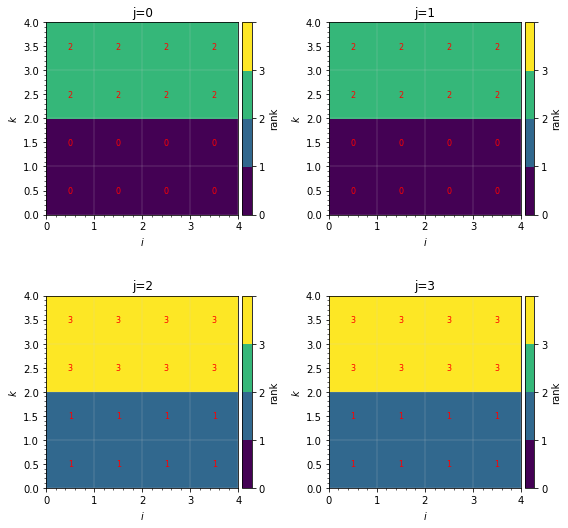

In [8]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
for j,ax in enumerate(axs.flatten()):
    plt.sca(ax)    
    plt.title('j={}'.format(j))
    plot_3D(sim_3D, j)
    plt.tight_layout()